# Introduction 

This data set looks at the math, reading, and writing test scores of 1,000 students. The data provides other information on the students such as gender, race, and whether or not the student receives assistance for lunch among others. It will be interesting to see which variables affect test scores and ultimately, we will want to increase test scores among all students in as fair and economically viable ways as possible. 

In [1]:
import os
os.chdir('C:\\Users\\M246047\\Documents\\Python')
import numpy as np
import pandas as pd
import datetime as dt
import pylab
from matplotlib import pyplot as plt
%matplotlib inline
import scipy as sc
from scipy.stats import ttest_ind
import re
import seaborn as sns
import scipy.stats as stats

In [2]:
testing = pd.read_csv('student_testing.csv')
testing = pd.DataFrame(testing)
print(testing.columns)
print('\n', testing.describe())

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

        math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [3]:

testing['total score'] = testing['math score'] + testing['reading score'] + testing['writing score']
print(testing.dtypes)
testing.head()

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
total score                     int64
dtype: object


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


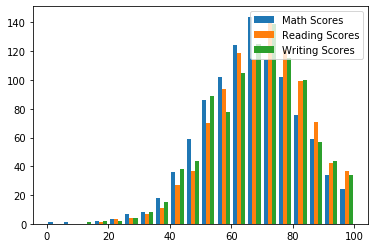

In [4]:
math = testing[['math score']]
math_scores = math.iloc[:, 0]
reading = testing[['reading score']]
reading_scores = reading.iloc[:, 0]
writing = testing[['writing score']]
writing_scores = writing.iloc[:, 0]
total = testing[['total score']]
total_score = total.iloc[:, 0]

plt.hist([math_scores, reading_scores, writing_scores], bins=20, label=['Math Scores', 'Reading Scores', 'Writing Scores'])
plt.legend(loc='upper right')
plt.show()

# fig, ax = plt.subplots()
# math_heights, math_bins = np.histogram(testing['math score'])
# reading_heights, reading_bins = np.histogram(reading['reading score'], bins=math_bins)
# writing_heights, writing_bins = np.histogram(writing['writing score'], bins=math_bins)

# width = (math_bins[1] - math_bins[0])/3
# ax.bar(math_bins[:-1], math_heights, width=width, alpha=.5, facecolor='cornflowerblue')
# ax.bar(reading_bins[:-1]+width, reading_heights, width=width, alpha=.5, facecolor='seagreen')
# ax.bar(writing_bins[:-1]+width, writing_heights, width=width, alpha=.5, facecolor='pink')
# #seaborn.despine(ax=ax, offset=10)
  
# plt.xlabel('Test Scores')
# plt.legend(loc='upper right')
# plt.title('Student Test Scores')
# plt.show()

## Distribution of Scores

The test scores are what we would expect - we have a nice bell shape curve with the math scores slightly lower and the reading and writing scores. I've created an additional column, 'total', for the total score for each student which is obtained by adding the three test scores already in the data set for additional analysis.

parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
Name: math score, dtype: float64


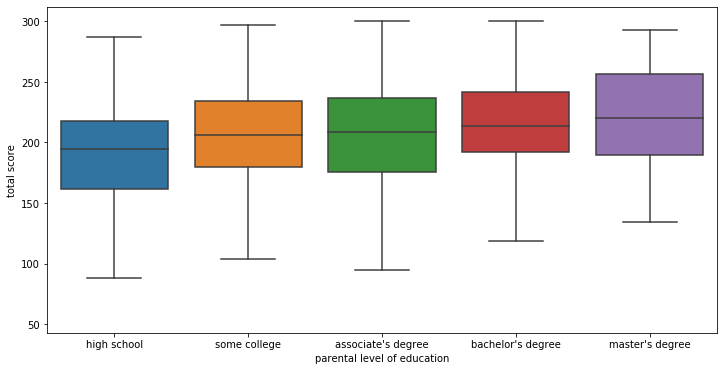

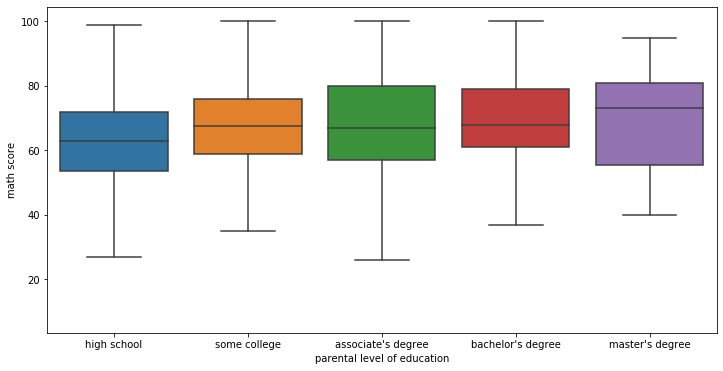

In [11]:
parent_ed = testing.groupby('parental level of education')['math score'].mean()
print(parent_ed[:5])
plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education',y='total score', order=['high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'], data=testing, fliersize=0)
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education',y='math score', order=['high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'], data=testing, fliersize=0)
plt.show()


## Parental Level of Education

We know that in general, the more education an individual has, the higher their income is. It should be no surprise that as the parental level of edcation increases, the average test score increases - these students are more likely to have their needs met, have a less stressful home environment, and the ability to complete test preparation courses. What I find interesting is that the increase is much less obvious in the math scores than the reading and writing scores. I'd be curious to look into this further to obtain an answer as to why this is. Perhaps this is the subject students are least likely to receive assistance from their parents on?

Free/reduced lunch math score:  lunch
free/reduced    58.921127
standard        70.034109
Name: math score, dtype: float64
Free/reduced lunch writing score:  lunch
free/reduced    63.022535
standard        70.823256
Name: writing score, dtype: float64
Free/reduced lunch math score:  lunch
free/reduced    64.653521
standard        71.654264
Name: reading score, dtype: float64


C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


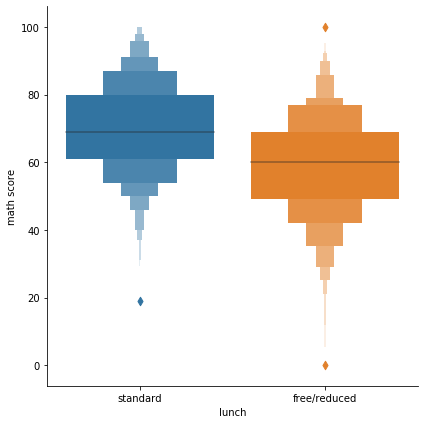

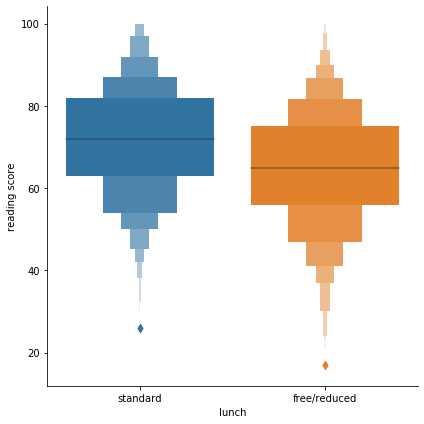

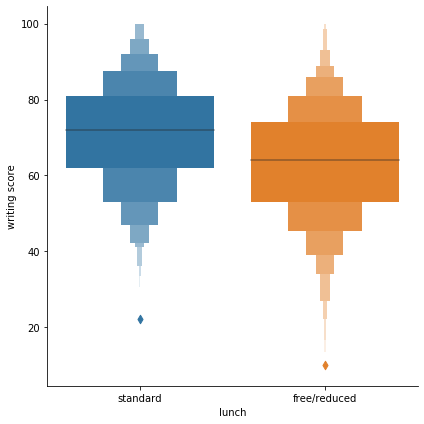

In [12]:
# Visualizing test scores of students who receive lunch assistance with those who do not.

print('Free/reduced lunch math score: ', testing.groupby('lunch')['math score'].mean())
print('Free/reduced lunch writing score: ', testing.groupby('lunch')['writing score'].mean())
print('Free/reduced lunch math score: ', testing.groupby('lunch')['reading score'].mean())
sns.catplot(x='lunch', y='math score', size=6, kind='boxen', data=testing)
sns.catplot(x='lunch', y='reading score', size=6, kind='boxen', data=testing)
sns.catplot(x='lunch', y='writing score', size=6, kind='boxen', data=testing)

## Type of Lunch
There is a clear distinction here: students who receive free/reduced lunch score significantly lower in all tests than students who receive a standard lunch. There are many possible explanations for this - if a student requires assistance for lunch it's likely that their parents may be struggling to support the family and they may not even be getting the proper nutrition at home. This brings me to the experiment I'd like to run - how does having a nutrient dense breakfast affect the learning process?

In [7]:
# Comparing test scores of students who receive lunch assistance with those who do not.
free_reduced = testing.loc[testing['lunch'] == 'free/reduced']
lunch = testing.loc[testing['lunch'] == 'standard']
free_reduced_math = free_reduced['math score']
lunch_math = lunch['math score']
free_reduced_total = free_reduced['total score']
lunch_total = lunch['total score']
t_val = stats.ttest_ind(free_reduced_math, lunch_math)
print('Statistic tests for math scores of students with lunch assistance vs. those without: \n ', t_val)
print('\n')
t_val = stats.ttest_ind(free_reduced_total, lunch_total)
print('Statistic tests for total scores of students with lunch assistance vs. those without: \n ', t_val)

Statistic tests for math scores of students with lunch assistance vs. those without: 
  Ttest_indResult(statistic=-11.837180472914612, pvalue=2.4131955993137074e-30)


Statistic tests for total scores of students with lunch assistance vs. those without: 
  Ttest_indResult(statistic=-9.575113051511472, pvalue=7.73679181249555e-21)


# The Experiment

Lower test scores reflect poorly on schools and decrease student morale. Increasing test scores would increase student confidence and potentially lead to additional opportunities in school and upon graduation. While we know tests don't accurately measure an individual's level of intelligence, a child who consistently does poorly on tests may sincerely believe they are incapable which may hinder them from reaching their full potential. 

It is often said that breakfast is the most important meal of the day. How does having or missing breakfast affect student test scores? I believe that starting the day with a nutrient-rich breakfast will increase test scores.  <br>
Null Hypothesis: eating breakfast has no impact on test scores.<br>
Alternative Hypothesis: eating breakfast will increase test scores.

In a perfect world, we would feed half the students a particular breakfast at school in the morning and have the other half come to school without having eaten. This may be taken negatively, so I might propose adding a simple yes or no question to every test: Do you eat breakfast on a regular basis? The variable of interest is test scores in breakfast and non-breakfast groups, and this would be an A/B manipulation where breakfast is eaten or not eaten. We would be able to run t-tests and find the p-value to tell us whether or not there is significant difference between the test scores.

To start this study, I would take a survey of the students asking who does and does not eat breakfast in the morning and compare the test scores of those two groups. I would then randomly choose 20% of the students who reported they do not eat breakfast to begin eating breakfast every morning. If after three tests scores increase by at least 10%, I would reject the null hypothesis and conclude that eating breakfast is positively impactful to student life and would request that all students eat breakfast before or at school in the morning. If after three tests scores increase but by less than 10%, I would observe for another three tests. If test scores do not increase by after three tests, I would conclude that eating breakfast is not impactful and allow students to return to their regular routine. 

Controlling for other variables is tricky here. We would use students of families with the same economic status who had not completed any test preparation - this should account for economic impact. We would look at students taking tests at the same time to account for a timing variable. I would also like to provide the breakfast to ensure that all students are receiving the same level of nutrients. 

Ideally, we would look at all three test scores (math, reading, and writing). It would be interesting to see how many of the categories were affected. If test scores for just one or two subjects increased, I'd like to look into why this is.

As mentioned previously, I would perform t-tests on both groups in each subject to determine how different the average scores are, and then find the p-values to determine whether or not our findings are significant. I don't see a reason to use a value other than 0.05, so we'll conclude our findings are significant and the null hypothesis to be false if we obtain this value. 
